In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download airline review data as a data frame
data = pd.read_csv(r"C:\Users\anhng\Documents\Masters\DSC550\Project\AirlineReviews.csv")

# Create list of U.S. airline names
US_airlines = ['Alaska Airlines', 'Allegiant Air', 'American Airlines', 'Delta Air Lines', 'Frontier Airlines', \
                'Hawaiian Airlines', 'Jetblue Airways', 'Southwest Airlines', 'Spirit Airlines', \
                'Sun Country Airlines', 'United Airlines']
               
fil_data = data.loc[data['AirlineName'].isin(US_airlines)]

fil_data.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
15758,7M9,Alaska Airlines,Economy Class,May 2023,9th May 2023,0,0,1,UnitedStates,1.0,...,Chicago to San Francisco,2,0,alaska-airlines,worst airline company ever,Family Leisure,Trip Verified,1,0,f7bdae64-683d-4657-9459-b7d01d78d437
15791,Boeing 737-9 max,Alaska Airlines,Economy Class,May 2023,3rd May 2023,0,4,5,UnitedKingdom,10.0,...,Tacoma to Kona,4,5,alaska-airlines,big thank you to all at Alaska Airlines,Couple Leisure,Not Verified,4,0,57163b0d-9daa-4f41-bbd5-f49f575b2017
15792,NaN,Alaska Airlines,Economy Class,April 2023,30th April 2023,0,2,1,UnitedStates,2.0,...,Chicago to Seattle,1,2,alaska-airlines,they kept switching gates,Solo Leisure,Trip Verified,4,3,5b00054b-b281-4dc4-9be2-881c35a54200
15793,NaN,Alaska Airlines,First Class,April 2023,29th April 2023,0,3,3,UnitedStates,1.0,...,Seattle to Phoenix,4,4,alaska-airlines,my last flight with them,Solo Leisure,Trip Verified,1,0,3ba78923-e1cc-4919-9339-fc1757a60bf6
15794,NaN,Alaska Airlines,Economy Class,April 2023,28th April 2023,1,3,1,UnitedStates,3.0,...,Seattle to Detroit,2,1,alaska-airlines,"unorganized, unpleasant, rude",Solo Leisure,Trip Verified,1,1,0f1176a4-49af-44e8-a33e-79ce62828560


### Graph #1

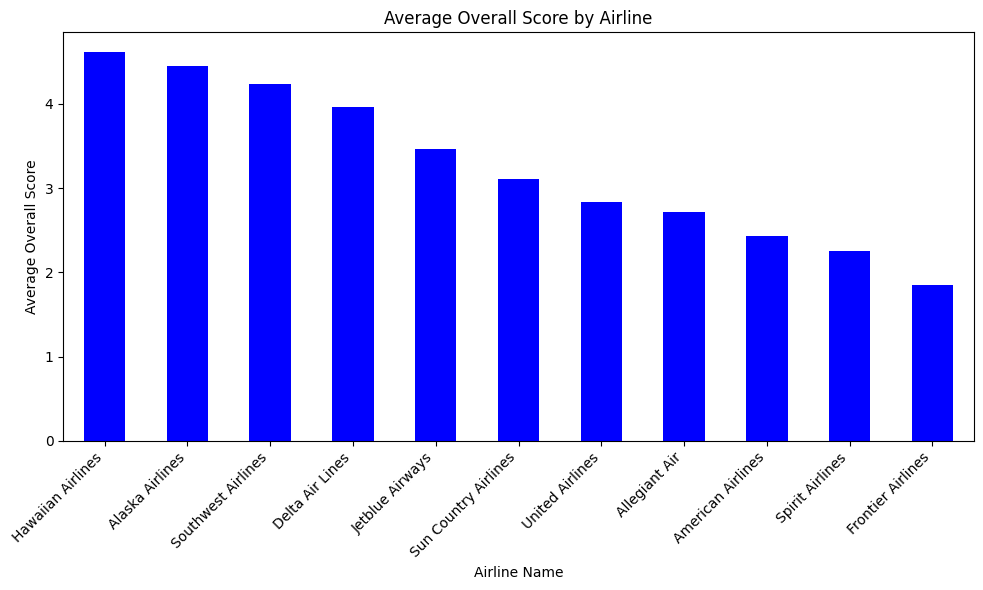

In [5]:
# Group by airline names and calculate the mean of the overall review score
avg_scores = fil_data.groupby('AirlineName')['OverallScore'].mean()
sorted_scores = avg_scores.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10,6))
sorted_scores.plot(kind='bar', color='blue')
plt.title('Average Overall Score by Airline')
plt.xlabel('Airline Name')
plt.ylabel('Average Overall Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I made a bar chart that shows the average ratings for each airline, from highest to lowest. This is based on all the reviews across the entire time period. The chart highlights that Hawaiian Airlines has the happiest guests, while Frontier Airlines ranks the lowest in guest satisfaction. This kind of insight helps identify which airlines are doing well in terms of guest experience and which ones need to figure out what’s not working to improve.

### Graph #2

C:\Users\anhng\AppData\Local\Temp\ipykernel_19700\1986964745.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fil_data['DateFlown'] = pd.to_datetime(fil_data['DateFlown'])
C:\Users\anhng\AppData\Local\Temp\ipykernel_19700\1986964745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data['DateFlown'] = pd.to_datetime(fil_data['DateFlown'])
C:\Users\anhng\AppData\Local\Temp\ipykernel_19700\1986964745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

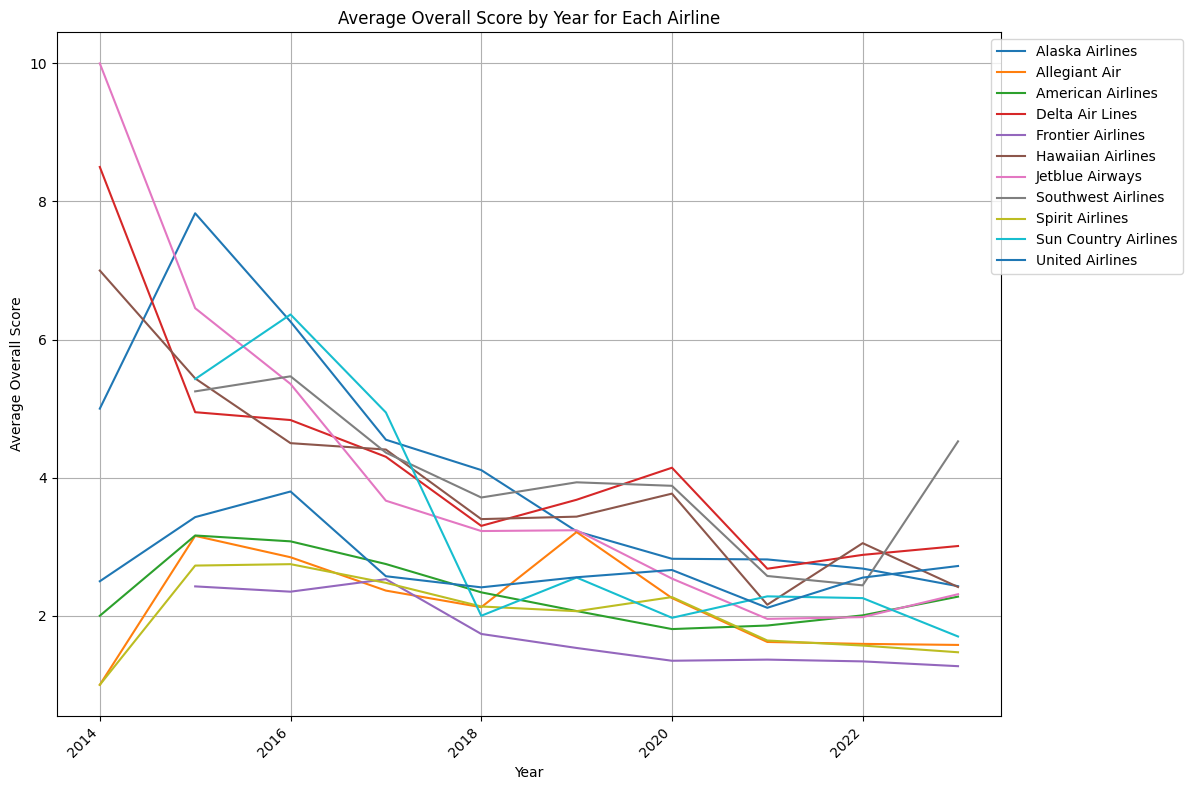

In [8]:
# Extract the years from dates guests flew
fil_data['DateFlown'] = pd.to_datetime(fil_data['DateFlown'])
fil_data['YearFlown'] = fil_data['DateFlown'].dt.year
avg_scores_per_year = fil_data.groupby(['AirlineName', 'YearFlown'])['OverallScore'].mean().reset_index()
pivot_data = avg_scores_per_year.pivot(index='YearFlown', columns='AirlineName', values='OverallScore')

# Create the line graph
plt.figure(figsize=(12,8))

# Plot each airline's data as a line
for airline in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[airline], label=airline)

# Customize the line graph
plt.title('Average Overall Score by Year for Each Airline')
plt.xlabel('Year')
plt.ylabel('Average Overall Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

I created a line graph that tracks how ratings have changed over the years for each airline. This can help spot any significant drops or improvements in guest satisfaction at certain points in time and could point to specific events or changes. For example, Delta’s ratings were declining from 2014 to 2018, but then started climbing from 2018 to 2020, before dropping again in 2020. What was Delta doing during 2018-2020 that improved guest satisfaction, and what happened in 2020 that caused it to fall again? On the flip side, Southwest’s ratings were steadily dropping since 2016 but have been on the rise again since 2022. It makes you wonder what changes Southwest recently made to improve their guests' experience

### Graph #3

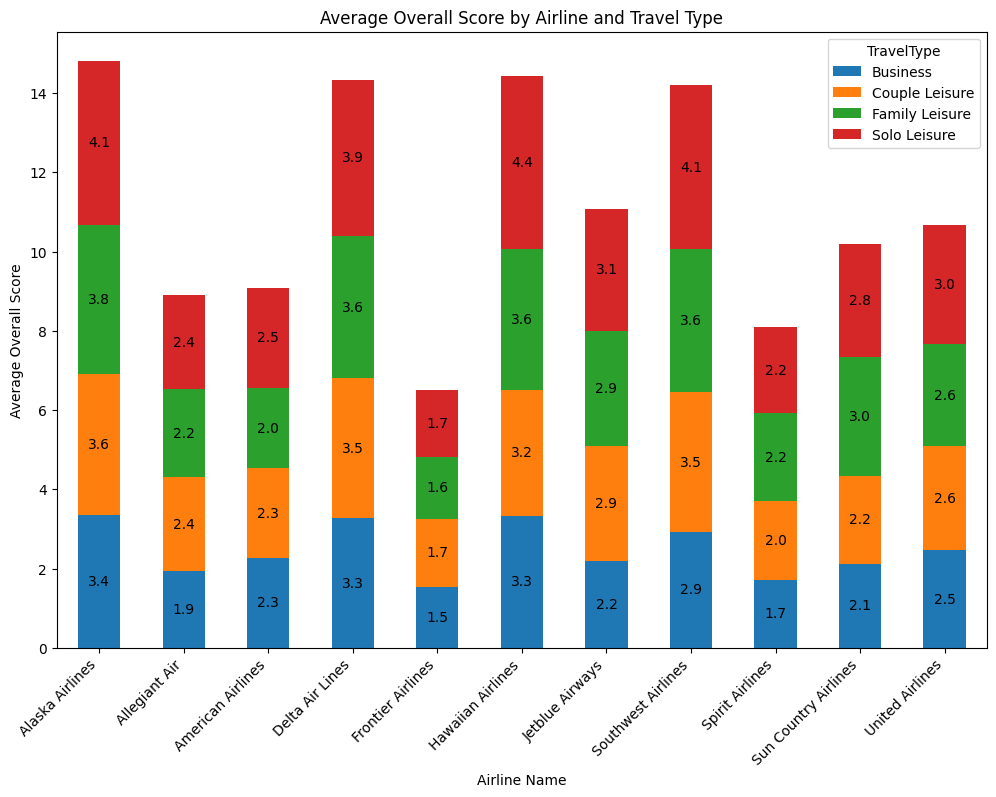

In [11]:
# Group by airline names and types of travel, then calculate the mean overall review score
travel_type_scores = fil_data.groupby(['AirlineName', 'TravelType'])['OverallScore'].mean().unstack()

# Plot the stacked bar chart
ax = travel_type_scores.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels to the stacked bars
for p in ax.patches:
    width = p.get_width() 
    height = p.get_height() 
    x = p.get_x() + width / 2 
    y = p.get_y() + height / 2 
    if height > 0:
        ax.text(x, y, f'{height:.1f}', ha='center', va='center', fontsize=10, color='black')

# Customize the chart
plt.title('Average Overall Score by Airline and Travel Type')
plt.xlabel('Airline Name')
plt.ylabel('Average Overall Score')
plt.xticks(rotation=45, ha='right')
plt.show()

I created a stacked bar chart that breaks down ratings by travel type (business, couple’s trip, family vacation, solo travel) for each airline. This makes it easy to see which types of travelers are happier with their airline experiences. For example, if American Airlines wants to attract more business travelers, they can see from the chart that their ratings for these trips are way lower compared to competitors like Delta, Southwest, and United. On the other hand, Frontier doesn’t really stand out in any travel category, suggesting they may need to work on improving guest satisfaction across the board.

### Graph #4

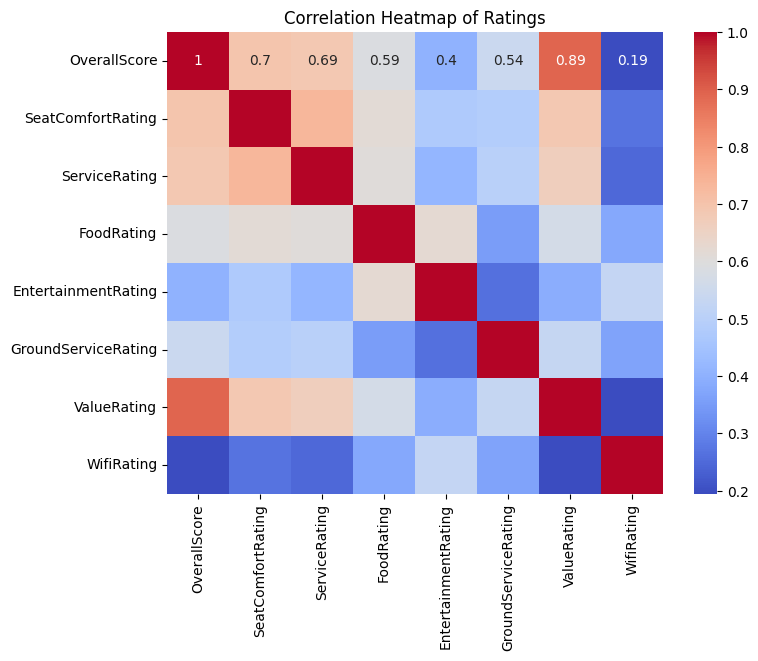

In [14]:
# Select relevant columns for correlation analysis
corr_matrix = fil_data[['OverallScore', 'SeatComfortRating', 'ServiceRating', 'FoodRating', \
                        'EntertainmentRating', 'GroundServiceRating', 'ValueRating', 'WifiRating']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Ratings')
plt.show()

I created a heat map to show which factors (like service, food, or seat comfort) are most strongly linked to the overall guest score. This helps airlines focus on areas that could make the biggest difference. The heat map shows that "Value Rating" has the strongest impact on the overall score, followed by "Seat Comfort" and "Service Rating." So, if airlines are looking to improve their ratings, these are key areas to focus on.

### Data Cleaning

In [18]:
# Filter the dataframe to keep rows where 'AirlineName' is in the list of U.S. airlines
data_us_airlines = data[data['AirlineName'].isin(US_airlines)]
data_us_airlines.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
15758,7M9,Alaska Airlines,Economy Class,May 2023,9th May 2023,0,0,1,UnitedStates,1.0,...,Chicago to San Francisco,2,0,alaska-airlines,worst airline company ever,Family Leisure,Trip Verified,1,0,f7bdae64-683d-4657-9459-b7d01d78d437
15791,Boeing 737-9 max,Alaska Airlines,Economy Class,May 2023,3rd May 2023,0,4,5,UnitedKingdom,10.0,...,Tacoma to Kona,4,5,alaska-airlines,big thank you to all at Alaska Airlines,Couple Leisure,Not Verified,4,0,57163b0d-9daa-4f41-bbd5-f49f575b2017
15792,NaN,Alaska Airlines,Economy Class,April 2023,30th April 2023,0,2,1,UnitedStates,2.0,...,Chicago to Seattle,1,2,alaska-airlines,they kept switching gates,Solo Leisure,Trip Verified,4,3,5b00054b-b281-4dc4-9be2-881c35a54200
15793,NaN,Alaska Airlines,First Class,April 2023,29th April 2023,0,3,3,UnitedStates,1.0,...,Seattle to Phoenix,4,4,alaska-airlines,my last flight with them,Solo Leisure,Trip Verified,1,0,3ba78923-e1cc-4919-9339-fc1757a60bf6
15794,NaN,Alaska Airlines,Economy Class,April 2023,28th April 2023,1,3,1,UnitedStates,3.0,...,Seattle to Detroit,2,1,alaska-airlines,"unorganized, unpleasant, rude",Solo Leisure,Trip Verified,1,1,0f1176a4-49af-44e8-a33e-79ce62828560


In [20]:
# Drop unnecessary columns
data_us_airlines = data_us_airlines.drop(['Aircraft', 'DatePub', 'Slug', 'TripVerified', 'unique_id', 'Title', 'Review'], axis=1)
data_us_airlines.head()

,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating
15758,Alaska Airlines,Economy Class,May 2023,0,0,1,UnitedStates,1.0,no,Chicago to San Francisco,2,0,Family Leisure,1,0
15791,Alaska Airlines,Economy Class,May 2023,0,4,5,UnitedKingdom,10.0,yes,Tacoma to Kona,4,5,Couple Leisure,4,0
15792,Alaska Airlines,Economy Class,April 2023,0,2,1,UnitedStates,2.0,no,Chicago to Seattle,1,2,Solo Leisure,4,3
15793,Alaska Airlines,First Class,April 2023,0,3,3,UnitedStates,1.0,no,Seattle to Phoenix,4,4,Solo Leisure,1,0
15794,Alaska Airlines,Economy Class,April 2023,1,3,1,UnitedStates,3.0,no,Seattle to Detroit,2,1,Solo Leisure,1,1


In [22]:
# Handle missing categorical data by filling with 'Unknown'
categorical_data = ['CabinType', 'DateFlown', 'OriginCountry', 'Route', 'TravelType']
data_us_airlines[categorical_data] = data_us_airlines[categorical_data].fillna('Unknown')
data_us_airlines.head()

,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating
15758,Alaska Airlines,Economy Class,May 2023,0,0,1,UnitedStates,1.0,no,Chicago to San Francisco,2,0,Family Leisure,1,0
15791,Alaska Airlines,Economy Class,May 2023,0,4,5,UnitedKingdom,10.0,yes,Tacoma to Kona,4,5,Couple Leisure,4,0
15792,Alaska Airlines,Economy Class,April 2023,0,2,1,UnitedStates,2.0,no,Chicago to Seattle,1,2,Solo Leisure,4,3
15793,Alaska Airlines,First Class,April 2023,0,3,3,UnitedStates,1.0,no,Seattle to Phoenix,4,4,Solo Leisure,1,0
15794,Alaska Airlines,Economy Class,April 2023,1,3,1,UnitedStates,3.0,no,Seattle to Detroit,2,1,Solo Leisure,1,1


In [24]:
# Fill missing numerical ratings with the median of each column
rating_columns = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore']
data_us_airlines[rating_columns] = data_us_airlines[rating_columns].fillna(data_us_airlines[rating_columns].median())
data_us_airlines.head()

,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating
15758,Alaska Airlines,Economy Class,May 2023,0,0,1,UnitedStates,1.0,no,Chicago to San Francisco,2,0,Family Leisure,1,0
15791,Alaska Airlines,Economy Class,May 2023,0,4,5,UnitedKingdom,10.0,yes,Tacoma to Kona,4,5,Couple Leisure,4,0
15792,Alaska Airlines,Economy Class,April 2023,0,2,1,UnitedStates,2.0,no,Chicago to Seattle,1,2,Solo Leisure,4,3
15793,Alaska Airlines,First Class,April 2023,0,3,3,UnitedStates,1.0,no,Seattle to Phoenix,4,4,Solo Leisure,1,0
15794,Alaska Airlines,Economy Class,April 2023,1,3,1,UnitedStates,3.0,no,Seattle to Detroit,2,1,Solo Leisure,1,1


In [26]:
# Extract the year from 'DatePub' and add it as a new column
data_us_airlines['YearFlown'] = pd.to_datetime(data_us_airlines['DateFlown'], errors='coerce').dt.year.astype('Int64')
data_us_airlines = data_us_airlines.drop('DateFlown', axis=1)
data_us_airlines.head()

C:\Users\anhng\AppData\Local\Temp\ipykernel_19700\4015113143.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_us_airlines['YearFlown'] = pd.to_datetime(data_us_airlines['DateFlown'], errors='coerce').dt.year.astype('Int64')


,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating,YearFlown
15758,Alaska Airlines,Economy Class,0,0,1,UnitedStates,1.0,no,Chicago to San Francisco,2,0,Family Leisure,1,0,2023
15791,Alaska Airlines,Economy Class,0,4,5,UnitedKingdom,10.0,yes,Tacoma to Kona,4,5,Couple Leisure,4,0,2023
15792,Alaska Airlines,Economy Class,0,2,1,UnitedStates,2.0,no,Chicago to Seattle,1,2,Solo Leisure,4,3,2023
15793,Alaska Airlines,First Class,0,3,3,UnitedStates,1.0,no,Seattle to Phoenix,4,4,Solo Leisure,1,0,2023
15794,Alaska Airlines,Economy Class,1,3,1,UnitedStates,3.0,no,Seattle to Detroit,2,1,Solo Leisure,1,1,2023


In [28]:
# Check how many rows have 'Route' values that do not contain ' to '
invalid_routes = data_us_airlines['Route'].str.count(' to ') != 1
print("Number of invalid 'Route' values:", invalid_routes.sum())

# Filter out only the rows where 'Route' values contain exactly one ' to '
valid_routes = data_us_airlines[~invalid_routes]

# Split the 'Route' column into 'Origin' and 'Destination'
split_data = valid_routes['Route'].str.split(' to ', expand=True)

# Rename the columns
split_data.columns = ['Origin', 'Destination']

# Combine the split columns back with the original dataframe (excluding invalid rows)
data_us_airlines = valid_routes.drop('Route', axis=1).join(split_data)

# Display the result
data_us_airlines.head()

Number of invalid 'Route' values: 4582


,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating,YearFlown,Origin,Destination
15758,Alaska Airlines,Economy Class,0,0,1,UnitedStates,1.0,no,2,0,Family Leisure,1,0,2023,Chicago,San Francisco
15791,Alaska Airlines,Economy Class,0,4,5,UnitedKingdom,10.0,yes,4,5,Couple Leisure,4,0,2023,Tacoma,Kona
15792,Alaska Airlines,Economy Class,0,2,1,UnitedStates,2.0,no,1,2,Solo Leisure,4,3,2023,Chicago,Seattle
15793,Alaska Airlines,First Class,0,3,3,UnitedStates,1.0,no,4,4,Solo Leisure,1,0,2023,Seattle,Phoenix
15794,Alaska Airlines,Economy Class,1,3,1,UnitedStates,3.0,no,2,1,Solo Leisure,1,1,2023,Seattle,Detroit


In [30]:
rating_cols = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'OverallScore',
               'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']
for col in rating_cols:
    data_us_airlines[col] = pd.to_numeric(data_us_airlines[col], errors='coerce').fillna(0)
data_us_airlines.head()

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating,YearFlown,Origin,Destination
15758,Alaska Airlines,Economy Class,0,0,1,UnitedStates,1.0,no,2,0,Family Leisure,1,0,2023,Chicago,San Francisco
15791,Alaska Airlines,Economy Class,0,4,5,UnitedKingdom,10.0,yes,4,5,Couple Leisure,4,0,2023,Tacoma,Kona
15792,Alaska Airlines,Economy Class,0,2,1,UnitedStates,2.0,no,1,2,Solo Leisure,4,3,2023,Chicago,Seattle
15793,Alaska Airlines,First Class,0,3,3,UnitedStates,1.0,no,4,4,Solo Leisure,1,0,2023,Seattle,Phoenix
15794,Alaska Airlines,Economy Class,1,3,1,UnitedStates,3.0,no,2,1,Solo Leisure,1,1,2023,Seattle,Detroit


In [32]:
data_us_airlines = pd.get_dummies(data_us_airlines, columns=['AirlineName', 'CabinType', 'OriginCountry', 'TravelType',
                                                            'Origin', 'Destination'], drop_first=True)
bool_columns = data_us_airlines.select_dtypes(include=['bool']).columns
data_us_airlines[bool_columns] = data_us_airlines[bool_columns].astype(int)
data_us_airlines.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,YearFlown,...,Destination_orlando,Destination_port of Spain via Ft Lauderdale,Destination_salt Lake City,Destination_san,Destination_to Bradley via Chicago,Destination_to GRR,Destination_to Kansas City via Dallas,Destination_to Seattle,Destination_to St Louis via Houston,Destination_via Tampa
15758,0,0,1,1.0,no,2,0,1,0,2023,...,0,0,0,0,0,0,0,0,0,0
15791,0,4,5,10.0,yes,4,5,4,0,2023,...,0,0,0,0,0,0,0,0,0,0
15792,0,2,1,2.0,no,1,2,4,3,2023,...,0,0,0,0,0,0,0,0,0,0
15793,0,3,3,1.0,no,4,4,1,0,2023,...,0,0,0,0,0,0,0,0,0,0
15794,1,3,1,3.0,no,2,1,1,1,2023,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data_us_airlines['Recommended'] = data_us_airlines['Recommended'].map({'yes': 1, 'no': 0})
data_us_airlines.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,YearFlown,...,Destination_orlando,Destination_port of Spain via Ft Lauderdale,Destination_salt Lake City,Destination_san,Destination_to Bradley via Chicago,Destination_to GRR,Destination_to Kansas City via Dallas,Destination_to Seattle,Destination_to St Louis via Houston,Destination_via Tampa
15758,0,0,1,1.0,0,2,0,1,0,2023,...,0,0,0,0,0,0,0,0,0,0
15791,0,4,5,10.0,1,4,5,4,0,2023,...,0,0,0,0,0,0,0,0,0,0
15792,0,2,1,2.0,0,1,2,4,3,2023,...,0,0,0,0,0,0,0,0,0,0
15793,0,3,3,1.0,0,4,4,1,0,2023,...,0,0,0,0,0,0,0,0,0,0
15794,1,3,1,3.0,0,2,1,1,1,2023,...,0,0,0,0,0,0,0,0,0,0


### Train a Logistic Regression model

In [37]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

# Sample 10% of the data
df_sample_log_reg = data_us_airlines.sample(frac=0.1, random_state=42)
X_log_reg = df_sample_log_reg.drop('Recommended', axis=1)
y_log_reg = df_sample_log_reg['Recommended']

# Drop rows with missing values
X_log_reg = X_log_reg.dropna()

# Ensure y matches the filtered X
y_log_reg = y_log_reg[X_log_reg.index]

# Split the data into training and test sets
X_train_log_reg, X_test_log_reg, y_train_log_reg, y_test_log_reg = train_test_split(X_log_reg, y_log_reg, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train Logistic Regression model on training data
log_reg.fit(X_train_log_reg, y_train_log_reg)

# Create prediction on test set
y_pred_log_reg = log_reg.predict(X_test_log_reg)

# Evaluate the performance of the model
log_reg_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test_log_reg, y_pred_log_reg),
    'Precision': precision_score(y_test_log_reg, y_pred_log_reg),
    'Recall': recall_score(y_test_log_reg, y_pred_log_reg),
    'F1 Score': f1_score(y_test_log_reg, y_pred_log_reg),
    'MAE': mean_absolute_error(y_test_log_reg, y_pred_log_reg),
    'MSE': mean_squared_error(y_test_log_reg, y_pred_log_reg),
}

### Train a Random Forest model

In [39]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

# Sample 10% of the data
df_sample_rf = data_us_airlines.sample(frac=0.1, random_state=42)
X_rf = df_sample_rf.drop('Recommended', axis=1)
y_rf = df_sample_rf['Recommended']

# Drop rows with missing values
X_rf = X_rf.dropna()

# Ensure y matches the filtered X
y_rf = y_rf[X_rf.index]

# Split the data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train Random Forest model on training data
rf_classifier.fit(X_train_rf, y_train_rf)

# Create prediction on test set
y_pred_rf = rf_classifier.predict(X_test_rf)

# Evaluate the performance of the model
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test_rf, y_pred_rf),
    'Precision': precision_score(y_test_rf, y_pred_rf),
    'Recall': recall_score(y_test_rf, y_pred_rf),
    'F1 Score': f1_score(y_test_rf, y_pred_rf),
    'MAE': mean_absolute_error(y_test_rf, y_pred_rf),
    'MSE': mean_squared_error(y_test_rf, y_pred_rf),
}

In [41]:
# Evaluate and compare the two models
comparison_df = pd.DataFrame([log_reg_metrics, rf_metrics])
comparison_df = comparison_df.set_index('Model').T
print(comparison_df)

Model      Logistic Regression  Random Forest
Accuracy              0.980477       0.978308
Precision             0.956044       0.976744
Recall                0.945652       0.913043
F1 Score              0.950820       0.943820
MAE                   0.019523       0.021692
MSE                   0.019523       0.021692


For this evaluation step, I wanted to see the accuracy, precision, recall, F1 score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared metrics. Accuracy gives a measure of overall performance, precision and recall offer insights into both models' performances, the F1 score balances precision and recall, MAE and MSE represent the average prediction error, and R-squared indicates the amount of variance provided by the models.

The comparison DataFrame shows that both the Logistic Regression and Random Forest models performed well. Logistic Regression has the upper hand in most metrics like accuracy, recall, F1 Score, MAE, MSE, and R-squared. On the other hand, Random Forest scored better in precision. While Random Forest can handle complex patterns in the data, Logistic Regression performed better with our training and test sets and will be the preferred model for this project.